In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import zipfile
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Quality Check Model

In [ ]:
with zipfile.ZipFile("/content/drive/MyDrive/QC Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("")

In [ ]:
x_data = []
y_data = []
df = pd.read_csv("QC Dataset/labels.csv")
for _, row in df.iterrows():
    data = np.load("QC Dataset/{}".format(row["File"]))
    x_data.append(data)
    y_data.append(row["Class"])

In [ ]:
x_data = np.array(x_data)
y_data = np.array(y_data)
print(x_data.shape)
print(y_data.shape)

(5277, 6000, 5)
(5277,)


In [ ]:
x_val_train, x_test, y_val_train, y_test = train_test_split(x_data,y_data,test_size=0.2,train_size=0.8)
x_train, x_val, y_train, y_val = train_test_split(x_val_train,y_val_train,test_size=0.2,train_size=0.8)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(3376, 6000, 5)
(3376,)
(845, 6000, 5)
(845,)
(1056, 6000, 5)
(1056,)


In [ ]:
# file: qc_model_best1.h5  (Biased for High Quality Signals)
# qc_model = keras.models.Sequential([
#     keras.layers.Conv1D(16, 20, strides = 10, input_shape = (6000,5), activation='relu'),
#     keras.layers.MaxPooling1D(),
#     keras.layers.Conv1D(32, 20, strides = 5, activation='relu'),
#     keras.layers.MaxPooling1D(),
#     keras.layers.Conv1D(64, 20, strides = 2, activation='relu'),
#     keras.layers.GlobalAveragePooling1D(),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(16, activation = "relu", kernel_regularizer = 'l2'),
#     keras.layers.Dense(1, activation = "sigmoid", kernel_regularizer = 'l2')
# ])
# qc_model.summary()
# adam = keras.optimizers.Adam(learning_rate = 0.01)
# qc_model.compile(loss = keras.losses.BinaryCrossentropy(), 
#               optimizer = adam, metrics = ["accuracy"])


# file: qc_model_best1_1.h5   (Balanced Model)
# qc_model = keras.models.Sequential([
#     keras.layers.Conv1D(16, 20, strides = 10, input_shape = (6000,5), activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPooling1D(),
#     keras.layers.Conv1D(32, 20, strides = 5, activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPooling1D(),
#     keras.layers.Conv1D(64, 20, strides = 3, activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.Conv1D(128, 3, strides = 1, padding = "same", activation='relu'),
#     keras.layers.GlobalAveragePooling1D(),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(16, activation = "relu", kernel_regularizer = 'l2'),
#     keras.layers.Dense(1, activation = "sigmoid", kernel_regularizer = 'l1')
# ])
# qc_model.summary()
# adam = keras.optimizers.Adam(learning_rate = 0.01)
# qc_model.compile(loss = keras.losses.BinaryCrossentropy(), 
#               optimizer = adam, metrics = ["accuracy"])


# file: qc_model_best1_2.h5    (Best Model Till Date)
# qc_model = keras.models.Sequential([
#     keras.layers.Conv1D(16, 20, strides = 10, input_shape = (6000,5), activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPooling1D(),
#     keras.layers.Conv1D(32, 20, strides = 5, activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPooling1D(),
#     keras.layers.Dropout(0.4),
#     keras.layers.Conv1D(64, 20, strides = 3, activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.Conv1D(128, 3, strides = 1, padding = "same", activation='relu'),
#     keras.layers.Flatten(),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(16, activation = "relu", kernel_regularizer = 'l2'),
#     keras.layers.Dense(1, activation = "sigmoid", kernel_regularizer = 'l1')
# ])
# qc_model.summary()
# adam = keras.optimizers.Adam(learning_rate = 0.01)
# qc_model.compile(loss = keras.losses.BinaryCrossentropy(), 
#               optimizer = adam, metrics = ["accuracy"])

In [ ]:
qc_model = keras.models.Sequential([
    keras.layers.Conv1D(16, 20, strides = 10, input_shape = (6000,5), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling1D(),
    keras.layers.Conv1D(32, 20, strides = 5, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling1D(),
    keras.layers.Dropout(0.4),
    keras.layers.Conv1D(64, 20, strides = 3, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv1D(128, 3, strides = 1, padding = "same", activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation = "relu", kernel_regularizer = 'l2'),
    keras.layers.Dense(1, activation = "sigmoid", kernel_regularizer = 'l1')
])
qc_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_48 (Conv1D)          (None, 599, 16)           1616      
                                                                 
 batch_normalization_23 (Bat  (None, 599, 16)          64        
 chNormalization)                                                
                                                                 
 max_pooling1d_26 (MaxPoolin  (None, 299, 16)          0         
 g1D)                                                            
                                                                 
 conv1d_49 (Conv1D)          (None, 56, 32)            10272     
                                                                 
 batch_normalization_24 (Bat  (None, 56, 32)           128       
 chNormalization)                                                
                                                     

In [ ]:
adam = keras.optimizers.Adam(learning_rate = 0.01)
qc_model.compile(loss = keras.losses.BinaryCrossentropy(), 
              optimizer = adam, metrics = ["accuracy"])

In [ ]:
# Callback

best_val_acc = 0
best_val_loss = 10
diff = 0


def saveModel(epoch,logs):
    global best_val_acc, best_val_loss, diff
    val_acc = logs['val_accuracy']
    val_loss = logs['val_loss']
    diff1 = val_acc - val_loss

    if val_acc > best_val_acc and val_loss < best_val_loss:
        best_val_acc = val_acc
        best_val_loss=val_loss
        qc_model.save("/content/drive/MyDrive/qc_model_best1_2.h5")
        print("\tSaved model on this epoch with max val_accuracy and min val_loss")
    elif diff1 > diff:
        diff = diff1
        qc_model.save("/content/drive/MyDrive/qc_model_best2_2.h5")
        print("\tSaved model on this epoch with max difference")

In [ ]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode = "min")
# def scheduler(epoch, lr):
#   return lr * tf.math.exp(-0.1)

# lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

history = qc_model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data = (x_val, y_val), callbacks=[keras.callbacks.LambdaCallback(on_epoch_end=saveModel)])

Epoch 1/50
169/169 [==============================] - 3s 11ms/step - loss: 0.7071 - accuracy: 0.6730 - val_loss: 0.7783 - val_accuracy: 0.5183
Epoch 2/50
169/169 [==============================] - 1s 9ms/step - loss: 0.5591 - accuracy: 0.6991 - val_loss: 0.6299 - val_accuracy: 0.5893
Epoch 3/50
169/169 [==============================] - 1s 8ms/step - loss: 0.5631 - accuracy: 0.7076 - val_loss: 0.5985 - val_accuracy: 0.6414
Epoch 4/50
169/169 [==============================] - 1s 9ms/step - loss: 0.5531 - accuracy: 0.7097 - val_loss: 0.5769 - val_accuracy: 0.6686
Epoch 5/50
169/169 [==============================] - 2s 9ms/step - loss: 0.5391 - accuracy: 0.7070 - val_loss: 0.5356 - val_accuracy: 0.7077
Epoch 6/50
169/169 [==============================] - 2s 10ms/step - loss: 0.5307 - accuracy: 0.7204 - val_loss: 0.5363 - val_accuracy: 0.7041
Epoch 7/50
169/169 [==============================] - 2s 10ms/step - loss: 0.5203 - accuracy: 0.7325 - val_loss: 0.5320 - val_accuracy: 0.7325
Epo

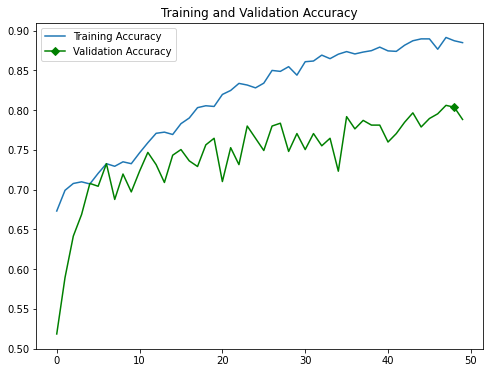

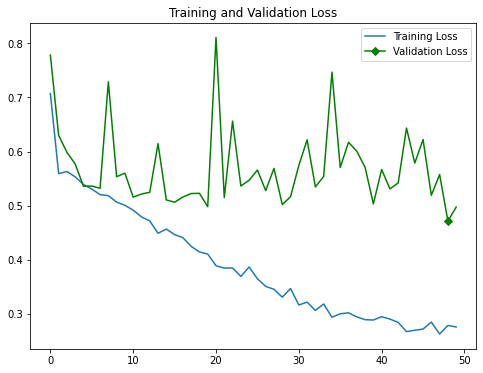

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

index = val_acc.index(best_val_acc)

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, '-gD', markevery=[index], label='Validation Accuracy')
plt.legend(loc='best')
plt.title('Training and Validation Accuracy')
# plt.savefig('accuracy.png')
plt.show()

index = val_loss.index(best_val_loss)

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, '-gD', markevery=[index], label='Validation Loss')
plt.legend(loc='best')
plt.title('Training and Validation Loss')
# plt.savefig('loss.png')
plt.show()

In [ ]:
model = keras.models.load_model("/content/drive/MyDrive/qc_model_best1_2.h5")
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_48 (Conv1D)          (None, 599, 16)           1616      
                                                                 
 batch_normalization_23 (Bat  (None, 599, 16)          64        
 chNormalization)                                                
                                                                 
 max_pooling1d_26 (MaxPoolin  (None, 299, 16)          0         
 g1D)                                                            
                                                                 
 conv1d_49 (Conv1D)          (None, 56, 32)            10272     
                                                                 
 batch_normalization_24 (Bat  (None, 56, 32)           128       
 chNormalization)                                                
                                                     

In [ ]:
predictions = model.predict(x_test)
predictions = predictions.flatten()
predictions[predictions >= 0.5] = 1.0
predictions[predictions < 0.5] = 0.0
predictions = np.int32(predictions)
print("Predictions: ", predictions)
print("\nTrue Labels: ", y_test)

33/33 [==============================] - 0s 4ms/step
Predictions:  [1 0 1 ... 0 0 0]

True Labels:  [1 0 1 ... 0 0 0]


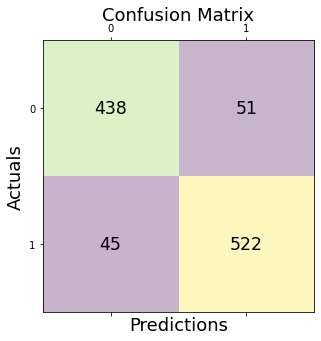

In [ ]:
from sklearn import metrics
# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=predictions)
tn, fp, fn, tp = conf_matrix.ravel()

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
# plt.savefig('confusion_matrix.png')

In [ ]:
# Precision, Recall, Accuracy, F1-Score
	
print('Precision: %.3f' % metrics.precision_score(y_test, predictions))
print('Recall: %.3f' % metrics.recall_score(y_test, predictions))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test, predictions))
print('F1 Score: %.3f' % metrics.f1_score(y_test, predictions))

specificity = tn / (tn+fp)
print('Specificity: ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity: ', sensitivity)

Precision: 0.911
Recall: 0.921
Accuracy: 0.909
F1 Score: 0.916
Specificity:  0.8957055214723927
Sensitivity:  0.9206349206349206


AUC Value:  0.9081702210536566


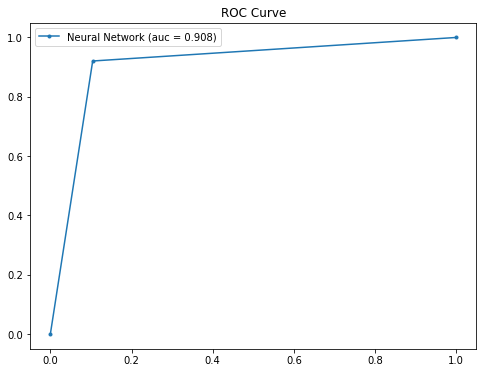

In [ ]:
# ROC Curve and AUC value
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = metrics.roc_curve(y_test, predictions)
auc_keras = metrics.auc(nn_fpr_keras, nn_tpr_keras)
print("AUC Value: ",auc_keras)
plt.figure(figsize=(8, 6))
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = {})'.format(round(auc_keras,3)))
plt.legend(loc='best')
plt.title('ROC Curve')
plt.show()
# plt.savefig('roc_curve.png')

## Different Train-Test-Split

In [ ]:
import gc
import os

In [ ]:
def get_name(index):
  if index == 0:
    return "Adam at LR- 0.01"
  elif index == 1:
    return "Adam at LR- 0.001"
  elif index == 2:
    return "RMSProp at LR- 0.01"
  elif index == 3:
    return "RMSProp at LR- 0.001"
  elif index == 4:
    return "SGD"

In [ ]:
dir = "Plots/"
os.makedirs(dir, exist_ok = True)

adam1 = keras.optimizers.Adam(learning_rate = 0.01)
adam2 = keras.optimizers.Adam(learning_rate = 0.001)
rmsprop1 = keras.optimizers.RMSprop(learning_rate = 0.01)
rmsprop2 = keras.optimizers.RMSprop(learning_rate = 0.01)
sgd = keras.optimizers.SGD()

optimizers = [adam1, adam2, rmsprop1, rmsprop2, sgd]

for i in [0.7, 0.8, 0.9]:
  print("============== Training Split: {} ====================".format(i))
  x_val_train, x_test, y_val_train, y_test = train_test_split(x_data,y_data,test_size=1-i,train_size=i)
  x_train, x_val, y_train, y_val = train_test_split(x_val_train,y_val_train,test_size=1-i,train_size=i)
  print("Training Data Shape: ", x_train.shape)
  print("Training Label Shape: ", y_train.shape)
  print("Validation Data Shape: ", x_val.shape)
  print("Validation Label Shape: ", y_val.shape)
  print("Test Data Shape: ", x_test.shape)
  print("Test Label Shape: ", y_test.shape)

  del x_val_train, y_val_train, x_test, y_test
  gc.collect()

  for optim in optimizers:
    index = optimizers.index(optim)
    print("Processing Request - ", get_name(index))
    qc_model = keras.models.Sequential([
        keras.layers.Conv1D(28, 20, strides = 10, input_shape = (6000,5), activation='relu'),
        keras.layers.GlobalAvgPool1D(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation = "sigmoid")
    ])
    qc_model.compile(loss = keras.losses.BinaryCrossentropy(), 
                    optimizer = optim, metrics = ["accuracy"])
    # training the model
    history = qc_model.fit(x_train, y_train, batch_size=30, epochs=50, validation_data = (x_val, y_val), verbose = 0)

    del qc_model
    gc.collect()

    # plotting the graph
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(history.history['loss']))

    plt.figure(figsize=(8, 6))
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='best')
    plt.title('Training and Validation Accuracy')
    name = dir + 'accuracy_{}_{}_{}.png'.format(get_name(index),i,1-i)
    plt.savefig(name)
    plt.clf()

    plt.figure(figsize=(8, 6))
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='best')
    plt.title('Training and Validation Loss')
    name = dir + 'loss_{}_{}_{}.png'.format(get_name(index),i,1-i)
    plt.savefig(name)
    plt.clf()

    del history, acc, val_acc, loss, val_loss, name, epochs_range
    gc.collect()
  del x_train, x_val, y_train, y_val
  gc.collect()

============== Training Split: 0.7 ====================
Training Data Shape:  (2585, 6000, 5)
Training Label Shape:  (2585,)
Validation Data Shape:  (1108, 6000, 5)
Validation Label Shape:  (1108,)
Test Data Shape:  (1584, 6000, 5)
Test Label Shape:  (1584,)
Processing Request -  Adam at LR- 0.01
Processing Request -  Adam at LR- 0.001
Processing Request -  RMSProp at LR- 0.01
Processing Request -  RMSProp at LR- 0.001
Processing Request -  SGD
============== Training Split: 0.8 ====================
Training Data Shape:  (3376, 6000, 5)
Training Label Shape:  (3376,)
Validation Data Shape:  (845, 6000, 5)
Validation Label Shape:  (845,)
Test Data Shape:  (1056, 6000, 5)
Test Label Shape:  (1056,)
Processing Request -  Adam at LR- 0.01
Processing Request -  Adam at LR- 0.001
Processing Request -  RMSProp at LR- 0.01
Processing Request -  RMSProp at LR- 0.001
Processing Request -  SGD
============== Training Split: 0.9 ====================
Training Data Shape:  (4274, 6000, 5)
Training L

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Processing Request -  Adam at LR- 0.001
Processing Request -  RMSProp at LR- 0.01
Processing Request -  RMSProp at LR- 0.001
Processing Request -  SGD


<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [ ]:
!zip -r /content/plots.zip /content/Plots

  adding: content/Plots/ (stored 0%)
  adding: content/Plots/loss_Adam at LR- 0.001_0.7_0.30000000000000004.png (deflated 6%)
  adding: content/Plots/loss_Adam at LR- 0.001_0.8_0.19999999999999996.png (deflated 7%)
  adding: content/Plots/accuracy_RMSProp at LR- 0.01_0.7_0.30000000000000004.png (deflated 4%)
  adding: content/Plots/loss_RMSProp at LR- 0.001_0.9_0.09999999999999998.png (deflated 5%)
  adding: content/Plots/accuracy_Adam at LR- 0.01_0.9_0.09999999999999998.png (deflated 6%)
  adding: content/Plots/loss_RMSProp at LR- 0.01_0.7_0.30000000000000004.png (deflated 4%)
  adding: content/Plots/accuracy_SGD_0.8_0.19999999999999996.png (deflated 6%)
  adding: content/Plots/accuracy_RMSProp at LR- 0.01_0.8_0.19999999999999996.png (deflated 5%)
  adding: content/Plots/accuracy_Adam at LR- 0.01_0.7_0.30000000000000004.png (deflated 4%)
  adding: content/Plots/accuracy_Adam at LR- 0.001_0.8_0.19999999999999996.png (deflated 6%)
  adding: content/Plots/accuracy_SGD_0.7_0.3000000000000

In [ ]:
from google.colab import files
files.download("/content/plots.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Stroke Model

In [3]:
with zipfile.ZipFile("/content/drive/MyDrive/Stroke Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("")

In [4]:
x_data = []
y_data = []
df = pd.read_csv("Stroke Dataset/labels.csv")
for _, row in df.iterrows():
    data = np.load("Stroke Dataset/{}".format(row["File"]))
    x_data.append(data)
    y_data.append(row["Label"])

In [5]:
x_data = np.array(x_data)
y_data = np.array(y_data)
print(x_data.shape)
print(y_data.shape)

(2723, 6000, 5)
(2723,)


In [6]:
x_val_train, x_test, y_val_train, y_test = train_test_split(x_data,y_data,test_size=0.2,train_size=0.8)
x_train, x_val, y_train, y_val = train_test_split(x_val_train,y_val_train,test_size=0.2,train_size=0.8)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(1742, 6000, 5)
(1742,)
(436, 6000, 5)
(436,)
(545, 6000, 5)
(545,)


In [7]:
stroke_model = keras.models.Sequential([
    keras.layers.Conv1D(32, 50, strides = 8, input_shape = (6000,5), activation='relu'),
    keras.layers.MaxPooling1D(),
    keras.layers.Conv1D(64, 50, strides = 8, input_shape = (6000,5), activation='relu', padding = "same"),
    keras.layers.MaxPooling1D(),
    keras.layers.Conv1D(64, 50, strides = 8, input_shape = (6000,5), activation='relu', padding = "same"),
    keras.layers.GlobalAvgPool1D(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation = "sigmoid")
])
stroke_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 744, 32)           8032      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 372, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 47, 64)            102464    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 23, 64)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 3, 64)             204864    
                                                                 
 global_average_pooling1d (G  (None, 64)               0

In [8]:
stroke_model.compile(loss = keras.losses.BinaryCrossentropy(), 
              optimizer = "adam", metrics = ["accuracy"])

In [9]:
# Callback

best_val_acc = 0
best_val_loss = 10
diff = 0

def saveModel(epoch,logs):
    global best_val_acc, best_val_loss, diff
    val_acc = logs['val_accuracy']
    val_loss = logs['val_loss']
    diff1 = val_acc - val_loss

    if val_acc > best_val_acc and val_loss < best_val_loss:
        best_val_acc = val_acc
        best_val_loss=val_loss
        stroke_model.save("/content/drive/MyDrive/stroke_model_best1.h5")
        print("\tSaved model on this epoch with max val_accuracy and min val_loss")
    elif diff1 > diff:
        diff = diff1
        stroke_model.save("/content/drive/MyDrive/stroke_model_best2.h5")
        print("\tSaved model on this epoch with max difference")

In [10]:
history = stroke_model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data = (x_val, y_val), callbacks=[keras.callbacks.LambdaCallback(on_epoch_end=saveModel)])

Epoch 1/50
88/88 [==============================] - 11s 24ms/step - loss: 0.5968 - accuracy: 0.6493 - val_loss: 0.2289 - val_accuracy: 0.9220
Epoch 2/50
88/88 [==============================] - 1s 11ms/step - loss: 0.1277 - accuracy: 0.9615 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 3/50
88/88 [==============================] - 2s 17ms/step - loss: 0.0288 - accuracy: 0.9925 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 4/50
88/88 [==============================] - 1s 10ms/step - loss: 0.0076 - accuracy: 0.9983 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 5/50
88/88 [==============================] - 1s 11ms/step - loss: 0.0109 - accuracy: 0.9983 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 6/50
88/88 [==============================] - 1s 10ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 4.6701e-04 - val_accuracy: 1.0000
Epoch 7/50
88/88 [==============================] - 1s 10ms/step - loss: 4.5112e-04 - accuracy: 1.0000 - val_loss: 6.4569e-04 - val_accuracy: 1.0000


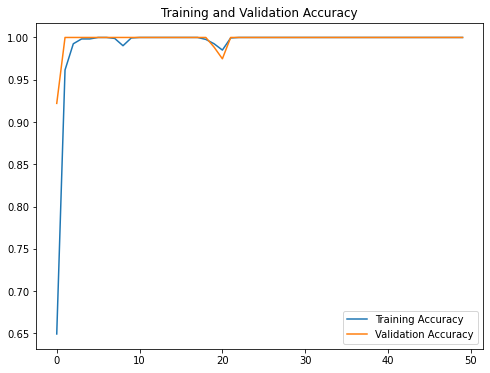

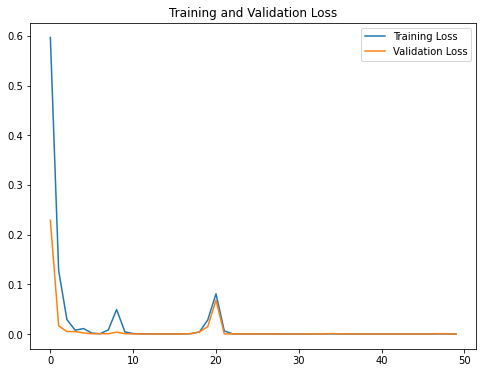

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='best')
plt.title('Training and Validation Accuracy')
# plt.savefig('accuracy.png')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('Training and Validation Loss')
# plt.savefig('loss.png')
plt.show()

In [12]:
model = keras.models.load_model("/content/drive/MyDrive/stroke_model_best1.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 744, 32)           8032      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 372, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 47, 64)            102464    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 23, 64)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 3, 64)             204864    
                                                                 
 global_average_pooling1d (G  (None, 64)               0

In [13]:
predictions = model.predict(x_test)
predictions = predictions.flatten()
predictions[predictions >= 0.5] = 1.0
predictions[predictions < 0.5] = 0.0
predictions = np.int32(predictions)
print("Predictions: ", predictions)
print("\nTrue Labels: ", y_test)

18/18 [==============================] - 0s 5ms/step
Predictions:  [0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1
 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1
 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1
 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0
 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1
 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0
 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0
 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0
 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1
 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1
 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 

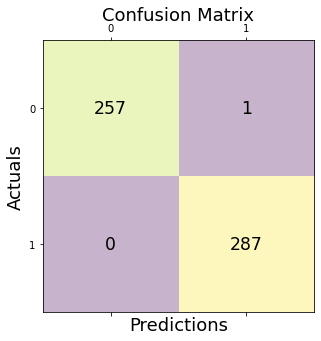

In [14]:
from sklearn import metrics
# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=predictions)
tn, fp, fn, tp = conf_matrix.ravel()

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
# plt.savefig('confusion_matrix.png')

In [15]:
# Precision, Recall, Accuracy, F1-Score
	
print('Precision: %.3f' % metrics.precision_score(y_test, predictions))
print('Recall: %.3f' % metrics.recall_score(y_test, predictions))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test, predictions))
print('F1 Score: %.3f' % metrics.f1_score(y_test, predictions))

specificity = tn / (tn+fp)
print('Specificity: ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity: ', sensitivity)

Precision: 0.997
Recall: 1.000
Accuracy: 0.998
F1 Score: 0.998
Specificity:  0.9961240310077519
Sensitivity:  1.0


AUC Value:  0.998062015503876


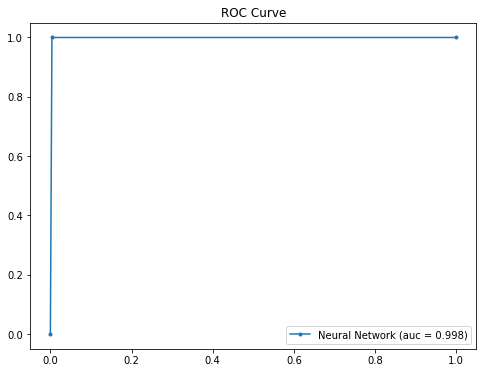

In [16]:
# ROC Curve and AUC value
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = metrics.roc_curve(y_test, predictions)
auc_keras = metrics.auc(nn_fpr_keras, nn_tpr_keras)
print("AUC Value: ",auc_keras)
plt.figure(figsize=(8, 6))
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = {})'.format(round(auc_keras,3)))
plt.legend(loc='best')
plt.title('ROC Curve')
plt.show()
# plt.savefig('roc_curve.png')